# pandas and scikit-learn 

## Kaggle Titanic 생존자 예측하기

https://www.kaggle.com/c/titanic/overview

## Data 가져오기

grapphlab의 SFrame와 유사한 pandas DataFrame을 사용해서 데이터를 가져 옵니다.

https://pandas.pydata.org/

In [171]:
import pandas as pd

train.csv, test.csv화일을 읽어서 각각 **train_df**, **test_df**에 저장합시다.

    pd.read_csv(화일위치)

In [172]:
train_df = pd.read_csv('../data/kaggle_titanic/train.csv')
test_df = pd.read_csv('../data/kaggle_titanic/test.csv')

train_df에 head 메소드를 이용해서 데이터의 내용을 확인합시다.

In [173]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


train_df의 유형을 확인해 봅시다.

In [174]:
type(train_df)

pandas.core.frame.DataFrame

test_df도 head 메소드로 살펴 봅시다.

In [175]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


shape을 이용해서 2개 데이터의 전체 크기를 각각 파악합시다.

In [176]:
train_df.shape

(891, 12)

In [177]:
test_df.shape

(418, 11)

아래 구문을 이용하면 컬럼 이름을 출력할 수 있습니다.

    DataFrame.columns.values

train_df과 test_df의 컬럼 이름을 각각 출력해서 어떤 데이터들이 있는지 확인합시다.

In [178]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [179]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

info() 메소드를 이용하면 DataFrame의 구조와 메모리 사용량을 확인할 수 있습니다.

    DataFrame.info()

In [180]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

describe 메소드를 이용하면 숫자로 된 데이터에 대한 정보를 얻을 수 있습니다

    DataFrame.describe()

먼저 train_df를 확인해 봅시다.

In [181]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


여기서 눈여겨 볼 점은 age의 count가 다른 데이터보다 작다는 것
입니다.

test_df도 확인해 봅시다.

In [182]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


역시 Age는 332개만 있고 Fare는 1개가 모자랍니다.

### null 값 확인하기
다음 메소드를 이용하면 각 셀에 들어있는 데이터에 null 값이 있는지를 확인해 줍니다. 

    DataFrame.isnulll()
    Series.isnull()

먼저 train_df에 적용해 봅시다.

In [183]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


False는 0, True는 1로 계산되기 때문에 sum 메소드를 이용하면 개수를 셀 수 있습니다. 각 컬럼에 대해서 연산을 수행합니다.

    DataFrame.isnull().sum()

먼저 train_df에 적용해 봅시다.

In [184]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age에 177개, Cabin에 687개, Embarked에 2가 비어 있다는 것을 확인할 수 있습니다.

마찬가지로 test_df에 대해서도 확인해 봅시다.

In [185]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age에 86개, Fare에 1개, Cabin에 327개가 비어 있다는 것을 확인할 수 있습니다.

이하에서 해당값들을 채울 것인지, 채운다면 어떤 방법으로 채울 것인지 (또는 drop할 것인지) 등을 정해야 학습이 가능합니다. 또한 train_df와 test_df 모두 처리해야 합니다. train_df만 처리하는 경우 train_df로 학습된 모델을 이용해서 test_df의 'Survived' 값을 예측할 때 에러가 나게 됩니다.

## Data Visualization

데이터 시각화 라이브러리인 **matplotlib**와 **seaborn**을 함께 사용하고자 합니다. 어떤 그래프를 그리냐에 따라 더 편리한 것을 사용합니다.

https://matplotlib.org/

https://seaborn.pydata.org/

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# 별도의 창이 아니라 노트북에 그래프가 표시되도록 함
%matplotlib inline 

# 캔바스 공간 크기 지정
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Visualization Helper Functions

correlation map을 그리기 위한 함수입니다. 다른 노트북에서 필요한 경우 아래 코드를 복사해서 사용하면 됩니다. (굳이 내용을 이해하지 않아도 됩니다.)

In [187]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

### Correlation Map 살펴보기

DataFrame을 넣으면 상관 관계를 그래프로 보여 주는 함수입니다.

    plot_correlation_map(df)

train_df의 상관관계를 살펴 봅시다.

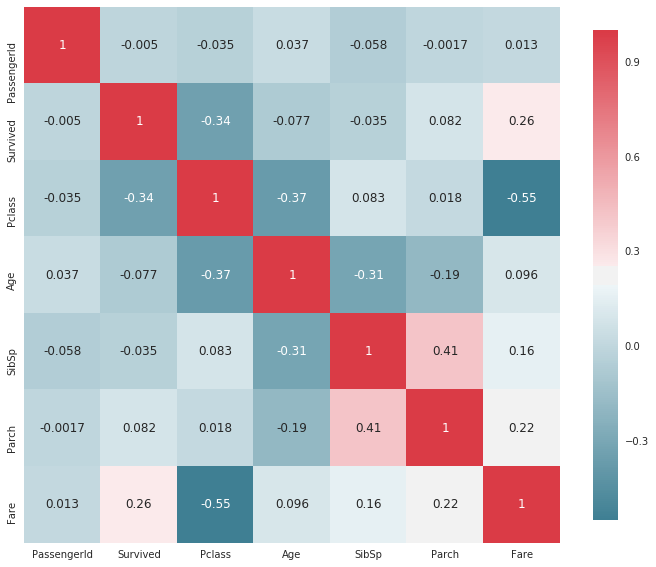

In [188]:
plot_correlation_map(train_df)

다음 메소드를 이용하면 표로 확인할 수 있습니다.
    
    DataFrame.corr()
    
train_df에 대해서 확인해 봅시다.

In [189]:
train_df.corr()[['Survived']]

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


여기서 주목할 점은 표에 나타난 데이터의 컬럼 수가 전체 데이터의 컬럼 수보다 작다는 것입니다. 

** 왜일까요? ** Sex도 없고, Cabin도, Embarked도 없습니다.

### Quiz 1

**여기서 생존율과 상관이 높은 값부터 작은 값까지 소팅해서 값을 확인하고자 할 때 어떻게 하면 될까요?**

아래 메소드를 이용해서 소팅이 가능합니다.

    DataFrame.sort_values(컬럼이름의리스트, ascending=False/True)

In [190]:
s_df = train_df.corr()[['Survived']]
s_df.sort_values([ 'Survived'], ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


### Quiz 2

여러개의 데이터 중에서 더 높은 상관관계를 가지는 값을 찾아야 보다 좋은 모델을 만들 수 있습니다.

** 위에서 구한 표를 이용하면 양의 상관관계가 높은 값부터 음의 상관관계가 높은 값으로 소팅이 되서 양/음 상관 없이 절대값을 비교하고자 할 때 불편합니다. 어떻게 하면 쉽게 비교할 수 있을까요? **

힌트: 절대값은 아래 명령으로 구할 수 있습니다. apply와 lambda를 사용해야 합니다.

    abs(값)

In [191]:
abs(s_df).sort_values([ 'Survived'], ascending=False)

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


Pclass, Fare, Parch, Age, SibSp 순으로 높은 상관관계를 보이는 것을 확인할 수 있습니다.

### correlation을 통해 확인한 문제점

- null값에 대한 처리가 아직 안함
- 카테고리 데이터가 빠져 있음

위 표에서는 null 값이 들어 있어서 정확한 값이 표시되고 있지 않고, 숫자가 아닌 값 (카테고리 데이터)들이 빠져 있기 때문에 모든 데이터에 대한 상관관계를 파악할 수 없습니다. 2개 문제를 해결한 후에 다시 비교해 봅시다.

## Data Pre-Processing

null 값이 있는 데이터들을 먼저 처리고 그런 다음 카테고리 데이터들을 숫자값으로 변환합시다.

### full data 만들기

데이터 전처리를 할 때 train_df와 test_df의 데이터를 모두 살펴 봐야 하는데 각각 살펴 보기에는 번거로우므로 하나로 합쳐서 처리하고자 합니다. **full_df**에 저장한 후 이하에서는 full_df를 사용합니다.

아래 코드를 이용하면 2개의 df를 합칠 수 있습니다.

    pd.concat([df1, df2, ...], axis=축방향)
    
축방향은 동일한 형태의 데이터를 합치는 경우 (하나의 df 아래에 다른 df를 붙이는 경우)에는 0 (row 방향), 컬럼을 추가하는 경우에는 1 (col 방향, 당연히 줄수가 같아야 함)을 사용합니다.

** 주의: train_df에는 test_df에 없는 'Survived' 컬럼이 있기 때문에 먼저 제거한 후에 합쳐야 합니다. **

    df.drop(삭제하고자하는컬럼이름, axis=축방향)
    

In [192]:
full_df = pd.concat([train_df.drop('Survived', axis=1), test_df], axis=0)

head 메소드로 확인해 봅시다.

In [193]:
full_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


shape으로 전체 행수를 확인해 봅시다.

In [194]:
full_df.shape

(1309, 11)

### 숫자 데이터들의 null 값 처리하기

먼저 숫자 데이터들인 Pclass, Fare, Parch, Age, SibSp 등을 각각 살펴보자. **null 값이 있는지 확인하고 채우면 됩니다.**
위에서 배운 코드를 사용합니다.

#### Pclass

Pclass 데이터에 null값이 있는지 확인해 봅시다.

In [195]:
full_df['Pclass'].isnull().sum()

0

null 값이 없습니다.

#### Fare

Fare 데이터에 null값이 있는지 확인해 봅시다.

In [196]:
full_df['Fare'].isnull().sum()

1

null값이 하나 존재합니다.

### Quiz 3

어떤 승객의 데이터인지를 확인해 봅시다. full_df에서 해당 승객을 찾아 봅시다. 어떻게 해야 할까요?

In [197]:
full_df[full_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


요금과 관련될 것 같은 해당 승객의 데이터를 살펴 보면 Cabin값이 null, Embarked가 S, Pclass는 3이라는 것을 알 수 있습니다. 

아래 코드를 이용해서 전체 승객 데이터의 Embarked, Fare, Pclass 간의 관계를 확인해 봅시다.

    grid.map(그래프종류, x=x축데이터로사용할컬럼이름, y=y축데이터로사용할컬럼이름, hue=hue로사용할컬럼이름)
    
여기서는 seaborn의 pointplot 그래프를, x축에는 Embarked를, y축에는 Fare, Hue로는 Pclass 등을 사용하고자 합니다.

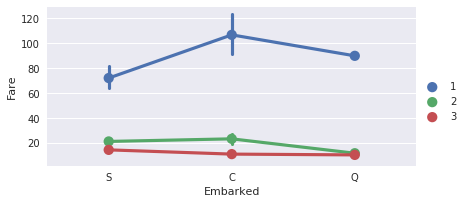

In [198]:
grid = sns.FacetGrid(full_df, size=3, aspect=2)
grid.map(sns.pointplot, 'Embarked', 'Fare', 'Pclass', palette='deep', order=None, hue_order=None)
grid.add_legend()

Pclass와 Embarked 값에 따라서 Fare가 큰 폭으로 변하는 것을 확인할 수 있습니다. 따라서 Pclass=3이면서 Embarked = S인 사람들만의 요금을 이용해서 평균을 내고자 합니다.

### Quiz 4

어떻게 하면 평균을 구할 수 있을까요? 평균을 구한 다음에 **fare_for_null**에 저장해 주세요.

** 힌트: W2 수업에서 특정 가격대의 집값을 구할 때 & 오퍼레이터를 사용한 적이 있습니다. **

In [199]:
fare_for_null = full_df[(full_df['Pclass']==3) & (full_df['Embarked'] == 'S')]['Fare'].mean()
fare_for_null

14.435422064777338

약 14.435 정도가 나오나요?

해당 승객군에 대한 요금의 평균을 구했다면 아래 메소드를 이용해서 null 값을 채워 봅시다.

    Series.fillna(채우고자하는값, inplace=True)

In [200]:
full_df['Fare'].fillna(fare_for_null, inplace=True)

### Quiz 5

해당 승객의 데이터를 다시 찾아서 Fare 값이 제대로 채워졌는지 확인합시다. 어떻게 해야 할까요?

In [201]:
full_df['Fare'].isnull().sum()

0

#### Parch

Parch 데이터에 null값이 있는지 확인해 봅시다.

In [202]:
full_df['Parch'].isnull().sum()

0

#### Age

Age 데이터에 null값이 있는지 확인해 봅시다.

In [203]:
full_df['Age'].isnull().sum()

263

총 263명의 승객에 대한 Age 데이터가 없습니다.

### Quiz 6 

전체 승객 수에서 Age 데이터가 없는 승객들이 차지하는 비율을 구해 봅시다.

In [204]:
full_df['Age'].isnull().sum()/float(len(full_df))

0.20091673032849502

약 20%의 승객이 나이에 대한 데이터가 없다는 것을 알 수 있습니다. 왜 이 데이터가 없을까요?

이 의문을 해결하기 위해 해당 승객들의 생존율을 전체 승객들의 생존율과 비교해 봅시다. 

**주의: 생존여부는 train_df에만 있기 때문에 train_df를 이용해서 구해야 합니다.**

먼저 train_df에 속한 승객들 전체의 생존율을 구해 봅시다.

In [205]:
train_df['Survived'].mean()

0.3838383838383838

약 0.383 정도입니다.

Age 값이 null인 승객들의 생존율의 평균을 구해 봅시다.

In [206]:
train_df[train_df['Age'].isnull()]['Survived'].mean()

0.2937853107344633

약 0.293 정도라는 것을 확인할 수 있습니다.

상대적으로 나이 정보가 없는 사람들의 생존율이 10% 정도 떨어진다는 것을 확인할 수 있습니다. 이는 아마도 생존하지 못했기 때문에 나이 정보가 없는 것이 아닐까 하고 추측해 볼 수 있습니다.

이 가설을 바탕으로 Age를 직접 사용하지 않고 **나이 정보가 없다는 여부**를 feature로 사용합시다.

### Quiz 7

'나이가 비어 있는지 여부'를 나타내는 Series를 만들어서 full_df에 **'AgeNull'**이라는 새로운 컬럼으로 저장합시다. 어떻게 할 수 있을까요?

** 주의: True/False가 아닌 숫자가 저장되어야 합니다. 왜일까요? **

힌트: True/False는 아래 명령으로 숫자로 만들 수 있습니다.
    
    int(값)

In [207]:
full_df['AgeNull'] = full_df['Age'].isnull().apply(lambda x: int(x))

head 메소드로 확인합시다.

In [208]:
full_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeNull
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### SibSp

SibSp 데이터에 null 값이 있는지 확인해 봅시다.

In [209]:
full_df['SibSp'].isnull().sum()

0

### 카테고리 데이터를 숫자값으로 변환하기

#### Sex 숫자값으로 변환하기

먼저 null 값이 있는지 확인합시다.

In [210]:
full_df['Sex'].isnull().sum()

0

##### 문자값을 숫자값으로 변환하기
female 또는 male 값을 숫자로 변환합시다.

- female: 0
- male: 1

### Quiz 8

**convert_sex_string_to_numeric**라는 함수를 만드세요. 하나의 argument를 받아서 해당 값이 female이면 0을, male이면 1을 반환해야 합니다.

In [211]:
def convert_sex_string_to_numeric(input):
    if input == 'female': return 0
    else: return 1

해당 함수를 Sex 데이터에 적용한 다음, full_df에 'Sex_code'라는 새로운 컬럼을 만들어 저장합시다.

In [212]:
full_df['Sex_code'] = full_df['Sex'].apply(lambda x:convert_sex_string_to_numeric(x))

잘 저장되었는지 head 메소드로 확인합시다.

In [213]:
full_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeNull,Sex_code
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


#### Embarked  숫자값으로 변환하기

먼저 null 값이 있는지 확인합시다.

In [214]:
full_df['Embarked'].isnull().sum()

2

2명에게 null 값이 존재합니다.

어떤 승객들인지 확인해 봅시다.

In [215]:
full_df[full_df['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeNull,Sex_code
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0


여기서 2명 모두 Pclass가 1이라는 것에 주목합시다. (Cabin과 Fare는 너무 구체적인 - 변동성이 큰 - 정보이기 때문에 Embarked를 구하는데 도움이 되지 않다고 가정합니다.)

아래 코드를 이용해서 전체 데이터 중에서 **Pclass가 1인 승객들**의 Embarked 데이터의 분포를 확인해 봅시다.

    grid.map(그래프종류, x=x축데이터로사용할컬럼이름, y=y축데이터로사용할컬럼이름, hue=hue로사용할컬럼이름)
    
여기서는 matplotli의 histogram 그래프를, x축에는 Embarked를, y축은 미지정(데이터 개수를 세게 됨) 등을 사용하고자 합니다.

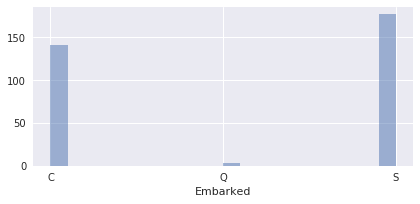

In [216]:
grid = sns.FacetGrid(full_df[full_df['Pclass'] == 1], size=3, aspect=2)
grid.map(plt.hist, 'Embarked', alpha=.5, bins=20)

### Quiz 9
혹시 Embarked가 생존율과 관계가 있는지 확인하기 위해 해당 사용자 모두가 train_df에 존재하는지 알아 봅시다. 어떻게 하면 될까요?

In [217]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2명 모두 train_df에 속해 있고 생존했다는 것을 확인할 수 있습니다. 이를 근거로 **Pclass == 1이고 생존한 사람들의 Embarked를 파악해서 null 값을 채우고자 합니다.**

아래 코드를 이용하면 Pclass가 1이고 생존한 승객들의 Embarked 분포를 파악할 수 있습니다.

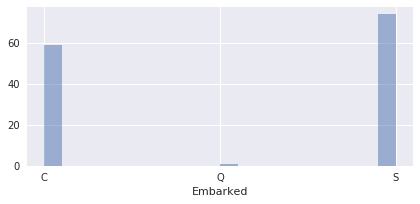

In [218]:
grid = sns.FacetGrid(train_df[(train_df['Pclass'] == 1) & (train_df['Survived'] == 1)], size=3, aspect=2)
grid.map(plt.hist, 'Embarked', alpha=.5, bins=20)

또 다른 방법은 아래처럼 여러개의 그래프를 동시에 그려서 파악하는 방법입니다. grid에 row와 col을 지정해서 해당값에 따라 여러개의 그래프가 그려지도록 합니다. 

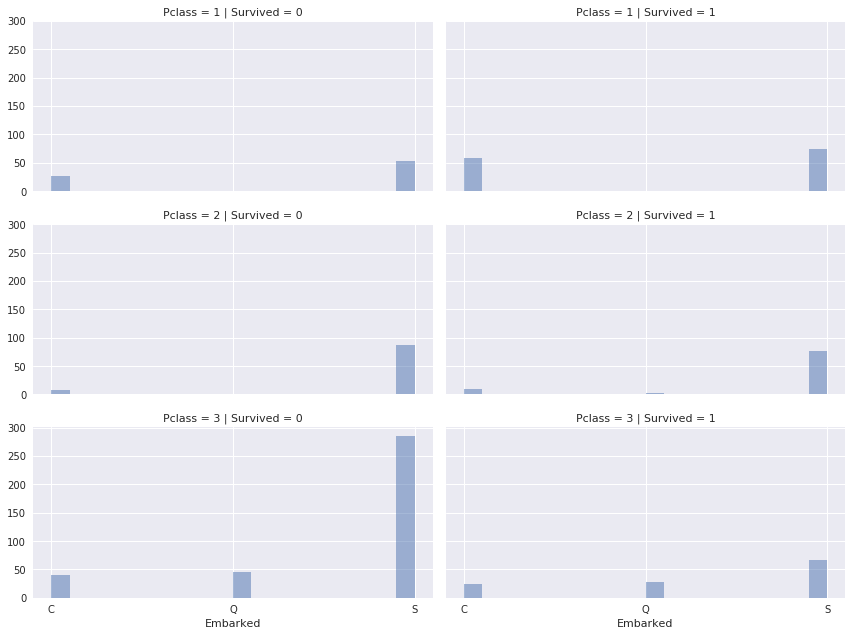

In [219]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Survived', size=3, aspect=2)
grid.map(plt.hist, 'Embarked', alpha=.5, bins=20)

카테고리 값이기 때문에 가장 많은 데이터 (S)를 이용하기로 합니다.

### Quiz 10

해당값으로 full_df의 Embarked의 null 값을 채워 봅시다.

In [220]:
full_df['Embarked'].fillna('S', inplace=True)

반드시 제대로 채워졌는지 확인합시다.

In [221]:
full_df['Embarked'].isnull().sum()

0

#### 문자값을 숫자값으로 변환하기
이제 문자값으로 된 카테고리를 숫자로 변환합시다. 많은 순서대로 0부터 지정합시다.

- S: 0
- C: 1
- Q: 2

### Quiz 11

**convert_embarked_string_to_numeric**라는 함수를 만드세요. 하나의 argument를 받아서 해당 값이 S이면 0을, C이면 1을, Q이면 2를 반환해야 합니다.

In [222]:
def convert_embarked_string_to_numeric(input):
    if input == 'S': return 0
    elif input =='C': return 1
    else: return 2

해당 함수를 Embarked 데이터에 적용한 다음, full_df에 'Embarked_cde'라는 새로운 컬럼을 만들어 저장합시다.

In [223]:
full_df['Embarked_code'] = full_df['Embarked'].apply(lambda x : convert_embarked_string_to_numeric(x))

head 메소드를 이용해서 확인합시다.

In [224]:
full_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeNull,Sex_code,Embarked_code
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0


### 문자값들 확인하기

Cabin, Ticket, Name 등은 문자열의 데이터입니다.

#### Cabin 살펴보기

Cabin 데이터에 null 값이 있는지 확인해 봅시다.

In [225]:
full_df['Cabin'].isnull().sum()

1014

총 1014명의 승객에 대한 Cabin 데이터가 없습니다. 전체 승객 수에서 차지하는 비율을 구해 봅시다.

In [226]:
float(full_df['Cabin'].isnull().sum()) / len(full_df)

0.774637127578304

약 77% 승객이 Cabin 데이터가 없다는 것을 확인할 수 있습니다. 왜 이 데이터가 없을까요?

이 의문을 해결하기 위해 해당 승객들의 생존율을 전체 승객들의 생존율과 비교해 봅시다. 

**주의: 생존여부는 train_df에만 있기 때문에 train_df를 이용해서 구해야 합니다.**

먼저 train_df에 속한 승객들 전체의 생존율을 구해 봅시다.

In [227]:
float(train_df['Survived'].sum()) / len(train_df)

0.3838383838383838

약 0.383 정도입니다.

Cabin 값이 null인 승객들의 생존율의 평균을 구해 봅시다.

In [228]:
train_df[train_df['Cabin'].isnull()]['Survived'].mean()

0.29985443959243085

약 0.299 정도라는 것을 확인할 수 있습니다.

상대적으로 Cabin 정보가 없는 사람들의 생존율이 9% 정도 떨어진다는 것을 확인할 수 있습니다. 이는 아마도 생존하지 못했기 때문에 Cabin 정보가 없는 것이 아닐까 하고 추측해 볼 수 있습니다.

이 가설을 바탕으로 Cabin을 직접 사용하지 않고 **Cabin 정보가 없다는 여부**를 feature로 사용합시다.

상대적으로 Cabin 정보가 없는 사람들이 훨씬 많이 죽었다는 것을 알 수 있다. 아마도 죽었기 때문에 Cabin 정보가 없기 때문이 아닐까 하고 추측해 볼 수 있습니다. 

**그래서 이 값을 feature로 사용하고자 합니다.**

### Quiz 12

'Cabin값이 비어 있는지 여부'를 나타내는 Series를 만들어서 full_df에 **'CabinNull'**이라는 새로운 컬럼으로 저장합시다. 어떻게 할 수 있을까요?

** 주의: True/False가 아닌 숫자가 저장되어야 합니다. 왜일까요? **

힌트: True/False는 아래 명령으로 숫자로 만들 수 있습니다.
    
    int(값)

In [229]:
full_df['CabinNull'] = full_df['Cabin'].isnull().apply(lambda x : int(x))

head 메소드로 확인합시다.

In [230]:
full_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeNull,Sex_code,Embarked_code,CabinNull
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,1


## (Advanced) Cabin 문자열을 분석해서 특징 잡아내기

이하에서는 Cabin 데이터에 포함된 정보를 분석해서 feature로 만드는 과정을 보여줍니다.

데이터를 살펴 보면
- '문자 1개 + 숫자'의 형태로 이루어져 있고
- 문자가 캐빈의 등급이나 위치를 나타낼 것으로 판단됩니다.

따라서 해당 문자만을 feature로 사용하고자 합니다. 이때 Null 값은 NaN, nan으로 파악되서 n이라는 문자로 변환됩니다. 

In [231]:
full_df[full_df['Cabin'].isnull().apply(lambda x: not x)]['Cabin']

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
301              D
305            B26
306        C22 C26
308            B69
314            C32
316            B78
321          F E57
322             F2
326             F4
331            A18
335           C106
343    B51 B53 B55
350        D10 D12
355            E60
356           C101
364            E50
371        E39 E41
372    B52 B54 B56
374            A34
378            C39
390            B24
391         

In [232]:
full_df['Cabin'].astype(str).str[0] # this captures the letter

0      n
1      C
2      n
3      C
4      n
5      n
6      E
7      n
8      n
9      n
10     G
11     C
12     n
13     n
14     n
15     n
16     n
17     n
18     n
19     n
20     n
21     D
22     n
23     A
24     n
25     n
26     n
27     C
28     n
29     n
      ..
388    n
389    n
390    B
391    D
392    n
393    n
394    n
395    C
396    n
397    B
398    n
399    n
400    C
401    n
402    n
403    n
404    D
405    D
406    n
407    C
408    n
409    n
410    n
411    C
412    n
413    n
414    C
415    n
416    n
417    n
Name: Cabin, dtype: object

In [233]:
full_df['Cabin_mapped'] = full_df['Cabin'].astype(str).str[0] # this captures the letter

# this transforms the letters into numbers
cabin_dict = {k:i for i, k in enumerate(full_df.Cabin_mapped.unique())} 
print(cabin_dict)
full_df.loc[:, 'Cabin_mapped'] = full_df.loc[:, 'Cabin_mapped'].map(cabin_dict)

{'E': 2, 'C': 1, 'T': 8, 'B': 6, 'A': 5, 'F': 7, 'D': 4, 'G': 3, 'n': 0}


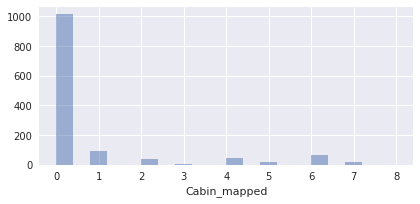

In [234]:
grid = sns.FacetGrid(full_df, size=3, aspect=2)
grid.map(plt.hist, 'Cabin_mapped', alpha=.5, bins=20)

### Correlation Map 다시 확인하기

correlation map은 Survived 값이 필요하기 때문에 full_df가 아닌 train_df에 있는 승객들만의 데이터로 그려야 합니다. 그래서 full_df를 이용해서 새로운 df를 만들어야 합니다. **train_process_df**라는 df를 만듭니다.

In [235]:
train_processed_df = pd.concat([full_df[:len(train_df)], train_df[['Survived']]], axis=1)

head 메소드로 확인합시다.

In [236]:
train_processed_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeNull,Sex_code,Embarked_code,CabinNull,Cabin_mapped,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,1,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,1,0,0


위에서 만든 train_processed_df을 넣어서 correlation map을 그려 봅시다.

    plot_correlation_map(df)

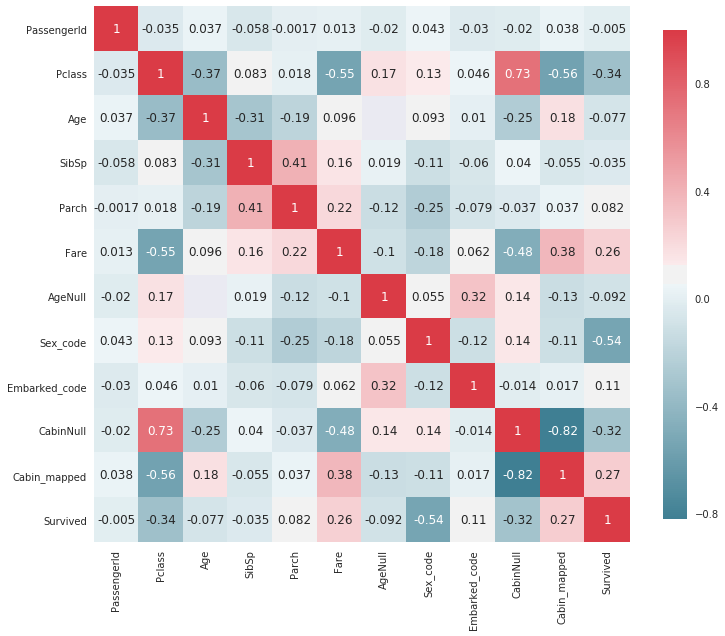

In [237]:
plot_correlation_map(train_processed_df)

corr() 메소드로 표를 그려 봅시다.

In [238]:
train_processed_df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,AgeNull,Sex_code,Embarked_code,CabinNull,Cabin_mapped,Survived
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.020167,0.042939,-0.030467,-0.019919,0.037616,-0.005007
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.172933,0.131900,0.045702,0.725541,-0.562800,-0.338481
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN,0.093254,0.010171,-0.249732,0.176955,-0.077221
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,0.018958,-0.114631,-0.059961,0.040460,-0.054525,-0.035322
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.124104,-0.245489,-0.078665,-0.036987,0.036944,0.081629
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.100707,-0.182333,0.062142,-0.482075,0.376888,0.257307
AgeNull,-0.020167,0.172933,NaN,0.018958,-0.124104,-0.100707,1.000000,0.055215,0.318940,0.144111,-0.128120,-0.092197
Sex_code,0.042939,0.131900,0.093254,-0.114631,-0.245489,-0.182333,0.055215,1.000000,-0.116569,0.140391,-0.114229,-0.543351
Embarked_code,-0.030467,0.045702,0.010171,-0.059961,-0.078665,0.062142,0.318940,-0.116569,1.000000,-0.013774,0.017250,0.106811
CabinNull,-0.019919,0.725541,-0.249732,0.040460,-0.036987,-0.482075,0.144111,0.140391,-0.013774,1.000000,-0.820837,-0.316912


위에서와 마찬가지로 생존율과 상관이 높은 값부터 작은 값까지 소팅해서 값을 확인합시다.

In [239]:
train_processed_df.corr()[['Survived']].sort_values('Survived', ascending=False)

,Survived
Survived,1.000000
Cabin_mapped,0.270310
Fare,0.257307
Embarked_code,0.106811
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
AgeNull,-0.092197
CabinNull,-0.316912


절대값으로 변환해서 값을 비교해 봅시다.

In [240]:

train_processed_df.corr()[['Survived']].apply(lambda x : abs(x)).sort_values('Survived', ascending=False)

,Survived
Survived,1.000000
Sex_code,0.543351
Pclass,0.338481
CabinNull,0.316912
Cabin_mapped,0.270310
Fare,0.257307
Embarked_code,0.106811
AgeNull,0.092197
Parch,0.081629
Age,0.077221


새로이 추가한 데이터들이 생존율과 상당히 높은 상관 관계를 가지는 것을 확인할 수 있습니다.

- 카테고리 데이터를 숫자로 변환한 데이터: Sex_code, Embarked_code
- 우리가 새로이 추가한 카테고리 데이터: CabinNull, AgeNull, Cabin_mapped

## Feature data 만들기

이제 모델을 학습하기 위해서 필요한 데이터들로만 이루어진 df를 만들고자 합니다.

제거하고자 하는 데이터 컬럼의 이름 리스트를 만들고 전체 데이터의 컬럼 이름 리스트에서 뺍니다. (리스트 간의 연산이 바로 이루어지지 않아서 set 명령을 이용해서 집합연산을 하고 다시 리스트로 변환합니다.)

In [241]:
drop_features = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Age']

In [242]:
full_df.columns.values.tolist()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'AgeNull',
 'Sex_code',
 'Embarked_code',
 'CabinNull',
 'Cabin_mapped']

In [243]:
features = list(set(full_df.columns.values.tolist()) - set(drop_features))

features를 출력해서 우리가 features로 사용하고자 하는 컬럼 이름들로만 구성되어 있는지 확인합시다.

In [244]:
features

['Sex_code',
 'CabinNull',
 'Pclass',
 'Fare',
 'Cabin_mapped',
 'SibSp',
 'Parch',
 'AgeNull',
 'Embarked_code']

### Quiz 13

해당 컬럼들의 데이터로만 이루어진 df를 출력해 봅시다.

In [245]:
full_df[features]

,Sex_code,CabinNull,Pclass,Fare,Cabin_mapped,SibSp,Parch,AgeNull,Embarked_code
0,1,1,3,7.2500,0,1,0,0,0
1,0,0,1,71.2833,1,1,0,0,1
2,0,1,3,7.9250,0,0,0,0,0
3,0,0,1,53.1000,1,1,0,0,0
4,1,1,3,8.0500,0,0,0,0,0
5,1,1,3,8.4583,0,0,0,1,2
6,1,0,1,51.8625,2,0,0,0,0
7,1,1,3,21.0750,0,3,1,0,0
8,0,1,3,11.1333,0,0,2,0,0
9,0,1,2,30.0708,0,1,0,0,1


### get_dummies

카테고리 값이 2개 이상인 feature들을 각각의 개별 컬럼으로 만들어 줍시다. 해당 결과를 **X_dummies**에 저장합시다.

    pd.get_dummies(데이터셋, 변환하고자하는컬럼이름들리스트, drop_first=True)

In [246]:
converting_columns = ['Sex_code', 'AgeNull', 'CabinNull', 'Cabin_mapped', 'Embarked_code', 'Pclass']

In [247]:
X_dummies = pd.get_dummies(full_df[features], 
                           columns = converting_columns,
                           drop_first=True)

head 메소드로 내용을 확인해 봅시다.

In [248]:
X_dummies.head()

,Fare,SibSp,Parch,Sex_code_1,AgeNull_1,CabinNull_1,Cabin_mapped_1,Cabin_mapped_2,Cabin_mapped_3,Cabin_mapped_4,Cabin_mapped_5,Cabin_mapped_6,Cabin_mapped_7,Cabin_mapped_8,Embarked_code_1,Embarked_code_2,Pclass_2,Pclass_3
0,7.2500,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,7.9250,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,53.1000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,8.0500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1


### Quiz 14
위의 get_dummies에서 drop_first는 무슨 기능을 할까요?

힌트: Embarked_code로 만들어진 컬럼이 왜 2개 밖에 없을까요? Pclass도 2개 밖에 없네요.

X_dummies의 dtypes를 출력해 봅시다.

In [249]:
X_dummies.dtypes

Fare               float64
SibSp                int64
Parch                int64
Sex_code_1           uint8
AgeNull_1            uint8
CabinNull_1          uint8
Cabin_mapped_1       uint8
Cabin_mapped_2       uint8
Cabin_mapped_3       uint8
Cabin_mapped_4       uint8
Cabin_mapped_5       uint8
Cabin_mapped_6       uint8
Cabin_mapped_7       uint8
Cabin_mapped_8       uint8
Embarked_code_1      uint8
Embarked_code_2      uint8
Pclass_2             uint8
Pclass_3             uint8
dtype: object

전체 데이터와 비교해 봅시다.

In [250]:
full_df[features].dtypes

Sex_code           int64
CabinNull          int64
Pclass             int64
Fare             float64
Cabin_mapped       int64
SibSp              int64
Parch              int64
AgeNull            int64
Embarked_code      int64
dtype: object

카테고리 데이터를 get_dummies로 변환하면 데이터 유형이 unit8로 변형되기 때문에 훨씬 적은 메모리와 연산 비용을 사용하게 됩니다.
또한 0과 1로만 구분 가능한 데이터가 되기 때문에 연산에 훨씬 유리합니다.

### Quiz 15

X_dummies 데이터를 다시 train 데이터와 test 데이터로 분리합니다. X_dummies는 full_df로부터 만들었습니다. full_df는 어떻게 만들었죠?
각각 X_data, X_test에 저장해 주세요.

In [251]:
X_data = X_dummies[:len(train_df)]
X_test = X_dummies[len(train_df):]

### Quiz 16 

생존자 데이터의 레이블을 Y_data에 저장해 봅시다.

In [252]:
Y_data = train_df.Survived

train 데이터와 validation 데이터를 분리하기 위해 아래 라이브러리를 import합니다.

    학습데이터피쳐들X, 검증데이터피쳐들X, 학습데이터의레이블, 검증데이터의레이블 = train_test_split(학습데이터피쳐들, 학습데이터의레이블, test_size=비율)

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_data,
                                                      Y_data,
                                                      test_size=.2)

** 중요: 위의 코드는 반드시 이해해야 합니다. **

## 모델 학습시키기

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

### Logistic Regression

In [257]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log_valid = round(logreg.score(X_valid, Y_valid) * 100, 2)

print(acc_log, acc_log_valid)

80.9 77.65


In [258]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [259]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
print(coeff_df)

           0
0   Survived
1     Pclass
2       Name
3        Sex
4        Age
5      SibSp
6      Parch
7     Ticket
8       Fare
9      Cabin
10  Embarked


In [260]:
coeff_df.columns = ['Feature']

In [261]:
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Ticket,0.817832
9,Cabin,0.540251
10,Embarked,0.445404
0,Survived,0.004614
8,Fare,-0.003662
4,Age,-0.008579
2,Name,-0.029847
6,Parch,-0.160952
1,Pclass,-0.307193
5,SibSp,-0.562725


### Support Vector Machines

In [262]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc_valid = round(svc.score(X_valid, Y_valid) * 100, 2)

print(acc_svc, acc_svc_valid)

80.76 75.98


### KNN

In [263]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn_valid = round(knn.score(X_valid, Y_valid) * 100, 2)

print(acc_knn, acc_knn_valid)

86.24 77.65


### Gaussian Naive Bayes

In [264]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian_valid = round(gaussian.score(X_valid, Y_valid) * 100, 2)

print(acc_gaussian, acc_gaussian_valid)

76.26 77.65


### Perceptron

In [265]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron_valid = round(perceptron.score(X_valid, Y_valid) * 100, 2)

print(acc_perceptron, acc_perceptron_valid)

72.75 75.98


### Linear SVC

In [266]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc_valid = round(linear_svc.score(X_valid, Y_valid) * 100, 2)

print(acc_linear_svc, acc_linear_svc_valid)

80.34 78.21


### Stochastic Gradient Descent

In [267]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd_valid = round(sgd.score(X_valid, Y_valid) * 100, 2)

print(acc_sgd, acc_sgd_valid)

45.08 43.02


### Decision Tree

In [268]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree_valid = round(decision_tree.score(X_valid, Y_valid) * 100, 2)

print(acc_decision_tree, acc_decision_tree_valid)

94.24 78.21


### Random Forest

In [269]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest_valid = round(random_forest.score(X_valid, Y_valid) * 100, 2)

print(acc_random_forest, acc_random_forest_valid)

94.24 77.65


### XG Boost

In [270]:
# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
xg_boost = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.9).fit(X_train, Y_train)
Y_pred = xg_boost.predict(X_test)
acc_xg_boost = round(sum(xg_boost.predict(X_train) == Y_train)/len(Y_train) * 100, 2)
acc_xg_boost_valid = round(sum(xg_boost.predict(X_valid) == Y_valid)/len(Y_valid) * 100, 2)

print(acc_xg_boost, acc_xg_boost_valid)

93.96 77.09


### XG Boost - Randomized

RandomizedSearchCV를 이용해서 최적의 파라미터를 찾는 방법

In [271]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xg_boost_rand = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                   estimator = gbm,
                                   scoring = "accuracy",
                                   n_iter = 50,
                                   cv = 4)


# Fit randomized_mse to the data
xg_boost_rand.fit(X_data, Y_data)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xg_boost_rand.best_params_)
print("Best accuracy found: ", xg_boost_rand.best_score_)

Best parameters found:  {'colsample_bytree': 1, 'max_depth': 7, 'n_estimators': 12, 'learning_rate': 0.55}
Best accuracy found:  0.813692480359


위에서 구해진 파라미터를 이용해서 예측하기

In [272]:
Y_pred = xg_boost_rand.predict(X_test)
acc_xg_boost_rand = round(sum(xg_boost_rand.predict(X_train) == Y_train)/len(Y_train) * 100, 2)
acc_xg_boost_rand_valid = round(sum(xg_boost_rand.predict(X_valid) == Y_valid)/len(Y_valid) * 100, 2)

print(acc_xg_boost_rand, acc_xg_boost_rand_valid)

89.75 91.06


## Comparison

위에서 학습시킨 모델의 Validation Score 비교하기

In [273]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'XG Boost', 'XG Boost - Randomized'],
    'ScoreOnValidation': [acc_svc_valid, acc_knn_valid, acc_log_valid, 
              acc_random_forest_valid, acc_gaussian_valid, acc_perceptron_valid, 
              acc_sgd_valid, acc_linear_svc_valid, acc_decision_tree_valid, acc_xg_boost_valid, acc_xg_boost_rand_valid]})
models.sort_values(by='ScoreOnValidation', ascending=False)

,Model,ScoreOnValidation
10,XG Boost - Randomized,91.06
7,Linear SVC,78.21
8,Decision Tree,78.21
1,KNN,77.65
2,Logistic Regression,77.65
3,Random Forest,77.65
4,Naive Bayes,77.65
9,XG Boost,77.09
0,Support Vector Machines,75.98
5,Perceptron,75.98


## 사용할 모델 선택한 후 submission 화일 생성하기

가장 좋은 결과를 보이는 모델 (또는 원하는 모델)을 선택해서 해당 학습 모델을 **final_model**에 지정합니다.
final_model에 다른 모델을 지정한 후 이 이하의 코드만 실행시키면 새로운 submission 화일을 반복적으로 만들 수 있습니다.

In [274]:
final_model = xg_boost_rand

X_test가 우리가 원하는 형태의 데이터가 맞는지 head 메소드로 확인해 봅시다.

In [275]:
X_test.head()

,Fare,SibSp,Parch,Sex_code_1,AgeNull_1,CabinNull_1,Cabin_mapped_1,Cabin_mapped_2,Cabin_mapped_3,Cabin_mapped_4,Cabin_mapped_5,Cabin_mapped_6,Cabin_mapped_7,Cabin_mapped_8,Embarked_code_1,Embarked_code_2,Pclass_2,Pclass_3
0,7.8292,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,7.0000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,9.6875,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,8.6625,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,12.2875,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [276]:
Y_pred = final_model.predict(X_test).astype(int)

Y_pred을 출력해 봅시다.

In [277]:
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

이제 캐글에서 요구하는 데이터 포맷으로 Y_pred를 저장합니다.

In [278]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

submission의 shape을 출력하고 head 메소드로 데이터를 살펴 봅시다.

In [279]:
submission.shape
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [280]:
submission.to_csv('../data/kaggle_titanic/submission.csv', index=False)

submission 화일이 성공적으로 만들어졌습니다.